In [1]:
# load the vader library for sentiment analysis
import pandas as pd
import numpy as np
import OpenBlender
import json
%matplotlib inline
import matplotlib
from pathlib import Path
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



In [2]:
import nltk
# nltk.download('wordnet')

# import these modules 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
# nltk.sentiment.vader

ps = PorterStemmer() # stemming
wordnet_lemmatizer = WordNetLemmatizer()  #Lemmatization

In [3]:
# get sentiment score applying the vaderSentiment functions
file_path = Path("combined_crypto_news.csv")
initial_db2 = pd.read_csv(file_path )


In [4]:
initial_db2.describe()

,Unnamed: 0,Unnamed: 0_x,timestamp,close_x,target_x,VEC.timestamp_x,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,Unnamed: 0_y,close_y,target_y,VEC.timestamp_y,VEC.COIN_SPECT.text_COUNT_last1days:bitcoin,Unnamed: 0.1,close,target,VEC.timestamp,VEC.COINJOURNA.text_COUNT_last1days:bitcoin
count,880.000000,880.000000,8.800000e+02,880.000000,880.000000,8.800000e+02,880.000000,880.000000,880.000000,880.000000,8.800000e+02,880.0,880.000000,880.000000,880.000000,8.800000e+02,880.000000
mean,439.500000,355.609091,1.613263e+09,32151.687500,0.511364,1.613263e+09,2.380682,355.609091,32151.687500,0.511364,1.613263e+09,0.0,355.609091,32151.687500,0.511364,1.613263e+09,2.439773
std,254.178415,170.294350,1.661947e+07,17447.526933,0.500155,1.661947e+07,2.122385,170.294350,17447.526933,0.500155,1.661947e+07,0.0,170.294350,17447.526933,0.500155,1.661947e+07,2.814073
min,0.000000,0.000000,1.577898e+09,4800.000000,0.000000,1.577898e+09,0.000000,0.000000,4800.000000,0.000000,1.577898e+09,0.0,0.000000,4800.000000,0.000000,1.577898e+09,0.000000
25%,219.750000,219.750000,1.599044e+09,11327.615000,0.000000,1.599044e+09,1.000000,219.750000,11327.615000,0.000000,1.599044e+09,0.0,219.750000,11327.615000,0.000000,1.599044e+09,0.000000
50%,439.500000,395.000000,1.619629e+09,35333.765000,1.000000,1.619629e+09,2.000000,395.000000,35333.765000,1.000000,1.619629e+09,0.0,395.000000,35333.765000,1.000000,1.619629e+09,1.000000
75%,659.250000,505.000000,1.627578e+09,46762.990000,1.000000,1.627578e+09,4.000000,505.000000,46762.990000,1.000000,1.627578e+09,0.0,505.000000,46762.990000,1.000000,1.627578e+09,5.000000
max,879.000000,585.000000,1.632503e+09,63575.000000,1.000000,1.632503e+09,10.000000,585.000000,63575.000000,1.000000,1.632503e+09,0.0,585.000000,63575.000000,1.000000,1.632503e+09,10.000000


In [5]:
initial_db2.drop_duplicates('timestamp', inplace=True )


In [6]:

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [7]:
print(emoticons)

{':D', '8-D', ':c)', '>:-)', ':-[', ':}', 'xp', ':-||', '8)', ":'-(", ':-D', ':3', 'xD', '=D', 'x-p', ';(', '>:(', '>:P', ':b', '>:)', ":')", ':(', '=\\', ':[', ':o)', ':<', '=]', 'X-P', ':-/', ':-<', ':>', '>:[', '8D', '=/', ':@', 'XP', ':-b', ':*', 'XD', '=p', '>.<', '<3', ':^)', '=-D', ':{', ':S', ':]', ':L', '=)', '=3', '>:\\', '>:/', ':\\', ':c', ':p', 'X-D', ':^*', ':)', ';)', ':-P', '>;)', ':-(', ':-c', '=L', '=-3', ':-)', ':-))', 'x-D', ":'-)", ':P', ":'(", ':-p'}


In [8]:
import re
# Emojis pattern
emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)

In [9]:
emoji_pattern

re.compile(r'[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿✂-➰Ⓜ-🉑🤦-🤷𐀀-\U0010ffff\u200d♀-♂☀-⭕⏏⏩⌚〰️]+',
re.UNICODE)

In [10]:
# punctuations pattern
punctuation_pattern = string.punctuation + "▼"
punctuation_pattern

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~▼'

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords_re = set(STOPWORDS)
update_list = ["btc", "bitcoin","blockchain", "crypto","cryptocurrency","ha","say","time","want","gonna","use","a","about",
              "actually","almost","also","although","always","am","an","and","any","are","as","at","be","became","become",
              "but","by","can","could","did","do","does","each","either","else","for","from","had","has","have","hence","how",
              "I","if","in","is","its","just","may","maybe","me","might","mine","must","my","mine","must","neither","nor","not",
              "of","oh","ok","when","where","whereas","wherever","whenever","whether","which","while","who","whom","whomever","whose",
              "why","will","with","within","without","would","yes","yet","you","your","people"]
stopwords_re.update(update_list)
print(stopwords_re)

{'of', 'almost', 'above', 'out', "what's", "we've", 'otherwise', "they're", 'such', 'ok', 'there', "couldn't", 'yes', 'below', 'up', "here's", 'however', "she'd", "he'll", 'like', 'to', 'too', 'having', 'in', 'ha', 'cannot', 'yet', 'had', 'am', 'when', 'oh', "where's", 'bitcoin', 'just', 'been', "shouldn't", 'again', "they've", 'hers', 'which', 'with', 'are', 'want', 'then', "who's", "wouldn't", 'itself', 'most', 'an', 'how', 'did', "you've", 'because', 'himself', 'therefore', 'for', 'my', 'has', "you're", 'will', 'some', 'shall', 'they', 'btc', 'ought', 'it', 'maybe', 'have', "she's", 'ours', "didn't", 'here', 'whenever', 'whereas', 'these', 'theirs', 'be', 'themselves', 'I', 'mine', "don't", "she'll", 'does', 'why', 'ever', 'the', 'wherever', 'through', "hadn't", "there's", "won't", 'and', 'than', 'whose', 'within', "when's", "he's", "they'll", "it's", "isn't", "how's", 'or', 'must', 'might', 'both', "i'd", "i'll", 'nor', 'not', 'that', 'without', "that's", "we'll", "mustn't", 'by', 

In [12]:
'''
clean_tweets()
contains: remove links, tokenize, reomve non-ASCII chars, convert to lower case, remove stop_words, remove 
'''
def clean_tweets(tweet):
    stop_words = set(stopwords.words('english'))
    # remove links
    tweet = re.sub(r'http\S+', '', tweet)
   
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the import re
   
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    tweet = re.sub(r'([0-9])\w+','',tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
 
    #remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
    
    word_tokens = word_tokenize(tweet)
 
    
    #tweet = re.sub(r"\b\w+\b",' ', tweet)
 
    #filter using NLTK library append it to a string
    #filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
 
    #looping through conditions
    for w in word_tokens:
        # convert to lower case
        w = w.lower()
        # lemmanization
        w = wordnet_lemmatizer.lemmatize(w)
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in punctuation_pattern:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)


In [13]:
# apply the clean_tweet() function on the clean_text column 
initial_db2['clean_text1'] = initial_db2['VEC.CRYPTOCURR.text_last1days:bitcoin'].apply(clean_tweets)
initial_db2['clean_text2'] = initial_db2['VEC.COIN_SPECT.text_last1days:bitcoin'].apply(clean_tweets)
initial_db2['clean_text3'] = initial_db2['VEC.COINJOURNA.text_last1days:bitcoin'].apply(clean_tweets)

In [14]:
# show last 5 clean_text 
initial_db2['clean_text1'].tail()
initial_db2['clean_text2'].tail()
initial_db2['clean_text3'].tail()
initial_db2.to_csv(r'comb_cleaned_text_df.csv')

In [15]:
##WORDCOUNT

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from imageio import imread
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os


In [17]:

# join tweets to a single stringif row['lang'] == 'en')
text = ' '.join(row['clean_text1'] for index, row in initial_db2.iterrows())
text = ' '.join(row['clean_text2'] for index, row in initial_db2.iterrows())
text = ' '.join(row['clean_text3'] for index, row in initial_db2.iterrows())
text = re.findall(r"\b\w+\b", text,flags=re.UNICODE)
text = " ".join(t for t in text)

#re.findall	returns all the matches as a list
#\b	restricts the match to the start/end of words
#\w	Match word character, same as [a-zA-Z0-9_]

In [18]:
# read the mask image
# taken from


twitter_mask = imread('twitter_mask.png')

wc = WordCloud(background_color="white",
               font_path='CabinSketch-Bold.ttf',
               max_words=600,
               stopwords=stopwords_re, 
               contour_width=3, 
               contour_color='steelblue',
               width=1800, 
               height=1400, 
               regexp=r"\b\w+\b", 
               mask=twitter_mask).generate(text)



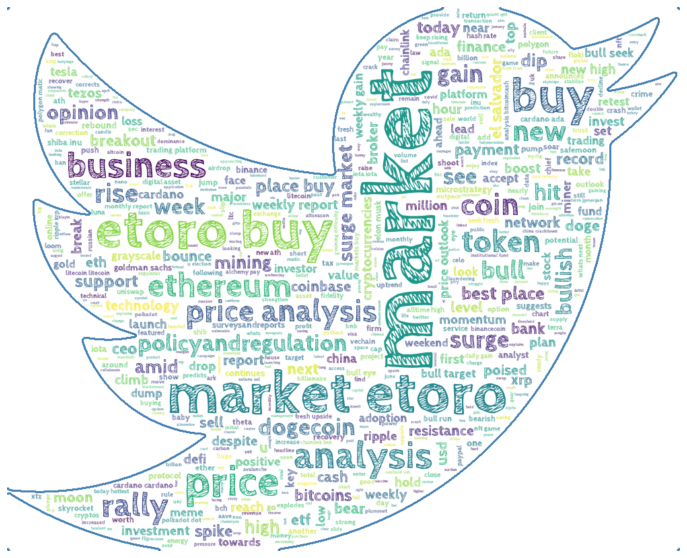

In [19]:
# show
plt.figure(figsize=(20,10))
_ = plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")
#NEED TO CLEAN UP SOME OF THESE STOPWORDS >>>
#NEED TO ADD DATA SOURCE 3

In [20]:
##Sentiment Analysis

In [21]:
# load the vader library for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [22]:
list(initial_db2)

['Unnamed: 0',
 'Unnamed: 0_x',
 'date_x',
 'timestamp',
 'close_x',
 'target_x',
 'VEC.timestamp_x',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_last1days:bitcoin',
 'Unnamed: 0_y',
 'date_y',
 'close_y',
 'target_y',
 'VEC.COIN_SPECT.text_last1days:bitcoin',
 'VEC.timestamp_y',
 'VEC.COIN_SPECT.text_COUNT_last1days:bitcoin',
 'Unnamed: 0.1',
 'date',
 'close',
 'target',
 'VEC.timestamp',
 'VEC.COINJOURNA.text_COUNT_last1days:bitcoin',
 'VEC.COINJOURNA.text_last1days:bitcoin',
 'clean_text1',
 'clean_text2',
 'clean_text3']

In [23]:
# get sentiment score applying the vaderSentiment functions
initial_db2['sentiment1'] = initial_db2['VEC.CRYPTOCURR.text_last1days:bitcoin'].apply(analyzer.polarity_scores)
initial_db2['sentiment2'] = initial_db2['VEC.COIN_SPECT.text_last1days:bitcoin'].apply(analyzer.polarity_scores)
initial_db2['sentiment3'] = initial_db2['VEC.COINJOURNA.text_last1days:bitcoin'].apply(analyzer.polarity_scores)

In [24]:
initial_db2.to_csv(r'cleaned_text_with_sentiment_scores_df.csv')

In [25]:
initial_db2['sentiment_comp1'] = [c['compound'] for c in initial_db2['sentiment1']]
initial_db2['sentiment_pos1'] = [c['pos'] for c in initial_db2['sentiment1']]
initial_db2['sentiment_neg1'] = [c['neg'] for c in initial_db2['sentiment1']]

initial_db2['sentiment_comp2'] = [c['compound'] for c in initial_db2['sentiment2']]
initial_db2['sentiment_pos2'] = [c['pos'] for c in initial_db2['sentiment2']]
initial_db2['sentiment_neg2'] = [c['neg'] for c in initial_db2['sentiment2']]

initial_db2['sentiment_comp3'] = [c['compound'] for c in initial_db2['sentiment3']]
initial_db2['sentiment_pos3'] = [c['pos'] for c in initial_db2['sentiment3']]
initial_db2['sentiment_neg3'] = [c['neg'] for c in initial_db2['sentiment3']]

In [26]:
initial_db2.to_csv(r'bitcoin_prices_fulltextscore.csv')
list(initial_db2)

['Unnamed: 0',
 'Unnamed: 0_x',
 'date_x',
 'timestamp',
 'close_x',
 'target_x',
 'VEC.timestamp_x',
 'VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin',
 'VEC.CRYPTOCURR.text_last1days:bitcoin',
 'Unnamed: 0_y',
 'date_y',
 'close_y',
 'target_y',
 'VEC.COIN_SPECT.text_last1days:bitcoin',
 'VEC.timestamp_y',
 'VEC.COIN_SPECT.text_COUNT_last1days:bitcoin',
 'Unnamed: 0.1',
 'date',
 'close',
 'target',
 'VEC.timestamp',
 'VEC.COINJOURNA.text_COUNT_last1days:bitcoin',
 'VEC.COINJOURNA.text_last1days:bitcoin',
 'clean_text1',
 'clean_text2',
 'clean_text3',
 'sentiment1',
 'sentiment2',
 'sentiment3',
 'sentiment_comp1',
 'sentiment_pos1',
 'sentiment_neg1',
 'sentiment_comp2',
 'sentiment_pos2',
 'sentiment_neg2',
 'sentiment_comp3',
 'sentiment_pos3',
 'sentiment_neg3']

In [27]:
data1 = [initial_db2["timestamp"], 
        initial_db2["close_x"],
        initial_db2["target_x"],
        initial_db2["sentiment_comp1"], 
        initial_db2["sentiment_neg1"], 
        initial_db2["sentiment_pos1"]]

data2 = [initial_db2["timestamp"], 
        initial_db2["close_x"],
        initial_db2["target_x"],
        initial_db2["sentiment_comp2"], 
        initial_db2["sentiment_neg2"], 
        initial_db2["sentiment_pos2"]]

data3 = [initial_db2["timestamp"], 
        initial_db2["close_x"],
        initial_db2["target_x"],
        initial_db2["sentiment_comp3"], 
        initial_db2["sentiment_neg3"], 
        initial_db2["sentiment_pos3"]]

df1 = pd.concat(data1, axis=1)
df2 = pd.concat(data2, axis=1)
df3 = pd.concat(data3, axis=1)

In [28]:
#DATA SOURCE #1:CoinJournal Tweet 
features = ['target_x', 'sentiment_pos1', 'sentiment_neg1','sentiment_comp1']
df1[features].corr()['target_x']
df_anchor1 = df1[features].corr()['target_x']
print(df_anchor1)
df1.describe()

target_x           1.000000
sentiment_pos1     0.010149
sentiment_neg1    -0.037466
sentiment_comp1   -0.040130
Name: target_x, dtype: float64


,timestamp,close_x,target_x,sentiment_comp1,sentiment_neg1,sentiment_pos1
count,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000
mean,1.605468e+09,25208.078659,0.538175,0.216864,0.022363,0.060607
std,1.654266e+07,17856.471349,0.499005,0.418990,0.049891,0.081988
min,1.577898e+09,4800.000000,0.000000,-0.967900,0.000000,0.000000
25%,1.591031e+09,9436.060000,0.000000,0.000000,0.000000,0.000000
50%,1.604768e+09,15297.210000,1.000000,0.000000,0.000000,0.000000
75%,1.620839e+09,39723.180000,1.000000,0.584800,0.027000,0.108000
max,1.632503e+09,63575.000000,1.000000,0.971900,0.540000,0.482000


In [29]:
#DATA SOURCE #2 : Coin Spectator Tweet
features = ['target_x', 'sentiment_pos2', 'sentiment_neg2','sentiment_comp2']
df2[features].corr()['target_x']
df_anchor2 = df2[features].corr()['target_x']
print(df_anchor2)
#NOT ABLE TO PULL NEWS FROM THIS DATASOURCE - NEED TO DUMP

target_x           1.0
sentiment_pos2     NaN
sentiment_neg2     NaN
sentiment_comp2    NaN
Name: target_x, dtype: float64


In [30]:
df2.describe()

,timestamp,close_x,target_x,sentiment_comp2,sentiment_neg2,sentiment_pos2
count,5.370000e+02,537.000000,537.000000,537.0,537.0,537.0
mean,1.605468e+09,25208.078659,0.538175,0.0,0.0,0.0
std,1.654266e+07,17856.471349,0.499005,0.0,0.0,0.0
min,1.577898e+09,4800.000000,0.000000,0.0,0.0,0.0
25%,1.591031e+09,9436.060000,0.000000,0.0,0.0,0.0
50%,1.604768e+09,15297.210000,1.000000,0.0,0.0,0.0
75%,1.620839e+09,39723.180000,1.000000,0.0,0.0,0.0
max,1.632503e+09,63575.000000,1.000000,0.0,0.0,0.0


In [31]:
#Datasource #3 CryptoCurrency News Tweet
features = ['target_x', 'sentiment_pos3', 'sentiment_neg3','sentiment_comp3']
df3[features].corr()['target_x']
df_anchor3 = df3[features].corr()['target_x']
print(df_anchor3)


target_x           1.000000
sentiment_pos3    -0.128761
sentiment_neg3    -0.120280
sentiment_comp3   -0.050299
Name: target_x, dtype: float64


In [32]:
#data news set 1
#reset date-time as the index
df1 =df1.set_index('timestamp')

In [33]:
df1['target_x'].value_counts()

1    289
0    248
Name: target_x, dtype: int64

In [34]:
df1.describe()

,close_x,target_x,sentiment_comp1,sentiment_neg1,sentiment_pos1
count,537.000000,537.000000,537.000000,537.000000,537.000000
mean,25208.078659,0.538175,0.216864,0.022363,0.060607
std,17856.471349,0.499005,0.418990,0.049891,0.081988
min,4800.000000,0.000000,-0.967900,0.000000,0.000000
25%,9436.060000,0.000000,0.000000,0.000000,0.000000
50%,15297.210000,1.000000,0.000000,0.000000,0.000000
75%,39723.180000,1.000000,0.584800,0.027000,0.108000
max,63575.000000,1.000000,0.971900,0.540000,0.482000


In [35]:
#Datasource 1:CoinJournal Tweet
# extract the differemt sentiment - pos, neu, neg 
pos_df1 = df1[df1['sentiment_comp1'] > 0]
neu_df1 = df1[df1['sentiment_comp1'] == 0]
neg_df1 = df1[df1['sentiment_comp1'] < 0]
len(pos_df1)

223

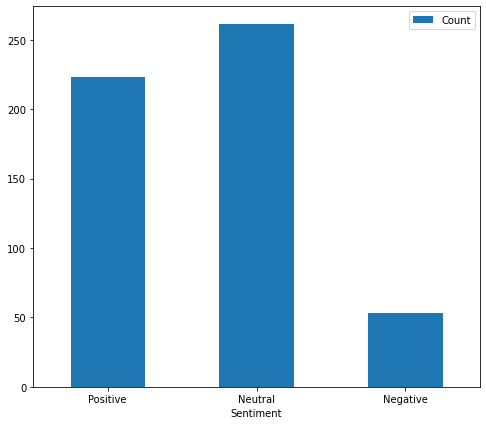

In [36]:
d = {'Sentiment': ['Positive', 'Neutral', 'Negative'], 
     'Count': [len(pos_df1), len(neu_df1),len(neg_df1)]}
pd.DataFrame(d).set_index('Sentiment').plot(kind='bar', figsize=(8, 7), rot=0)
_ = plt.xlabel("Sentiment")

In [37]:

# extract the differemt sentiment - from DATA SOURCE #3:CryptoCurrency News Tweet
pos_df3 = df3[df3['sentiment_comp3'] > 0]
neu_df3 = df3[df3['sentiment_comp3'] == 0]
neg_df3 = df3[df3['sentiment_comp3'] < 0]
len(pos_df3)

135

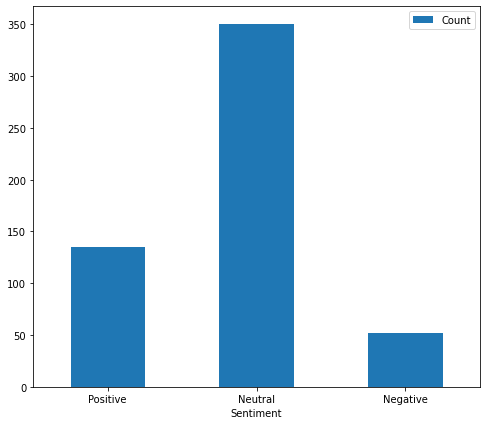

In [38]:
d3 = {'Sentiment': ['Positive', 'Neutral', 'Negative'], 
     'Count': [len(pos_df3), len(neu_df3),len(neg_df3)]}
pd.DataFrame(d3).set_index('Sentiment').plot(kind='bar', figsize=(8, 7), rot=0)
_ = plt.xlabel("Sentiment")

In [39]:
#Word Cloud comparison - generating word clouds for the 3 groups to see the most
#frequent words used amoung twitter news 

In [40]:
#data source #1

def generate_wordcloud(df1,title): #file_path, title):
    # join tweets to a single string
    text = ' '.join(row['clean_text1'] for index, row in initial_db2.iterrows())
    text = re.findall(r"\b\w+\b", text, flags=re.UNICODE)
    text = " ".join(t for t in text)
    
    # read the mask image
    wc1 = WordCloud(background_color="white", max_words=100, #mask=twitter_mask,
               stopwords=stopwords_re, contour_width=3, contour_color='steelblue',regexp=r"\b\w+\b",
               width=1000, height=800, font_path='CabinSketch-Bold.ttf').generate(text)

    # show
    #fig = plt.figure(figsize=(20,10))
    plt.figure(figsize=(20,10))
    plt.imshow(wc1, interpolation='bilinear')
    plt.axis("off")
    
    return fig

In [41]:
initial_db2.head(2)

,Unnamed: 0,Unnamed: 0_x,date_x,timestamp,close_x,target_x,VEC.timestamp_x,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,VEC.CRYPTOCURR.text_last1days:bitcoin,Unnamed: 0_y,...,sentiment3,sentiment_comp1,sentiment_pos1,sentiment_neg1,sentiment_comp2,sentiment_pos2,sentiment_neg2,sentiment_comp3,sentiment_pos3,sentiment_neg3
0,0,0,01-01-2020 17:00:00,1.577898e+09,7200.85,1,1577898000,0,[],0,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,02-01-2020 17:00:00,1.577984e+09,6965.71,0,1577984400,0,[],1,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


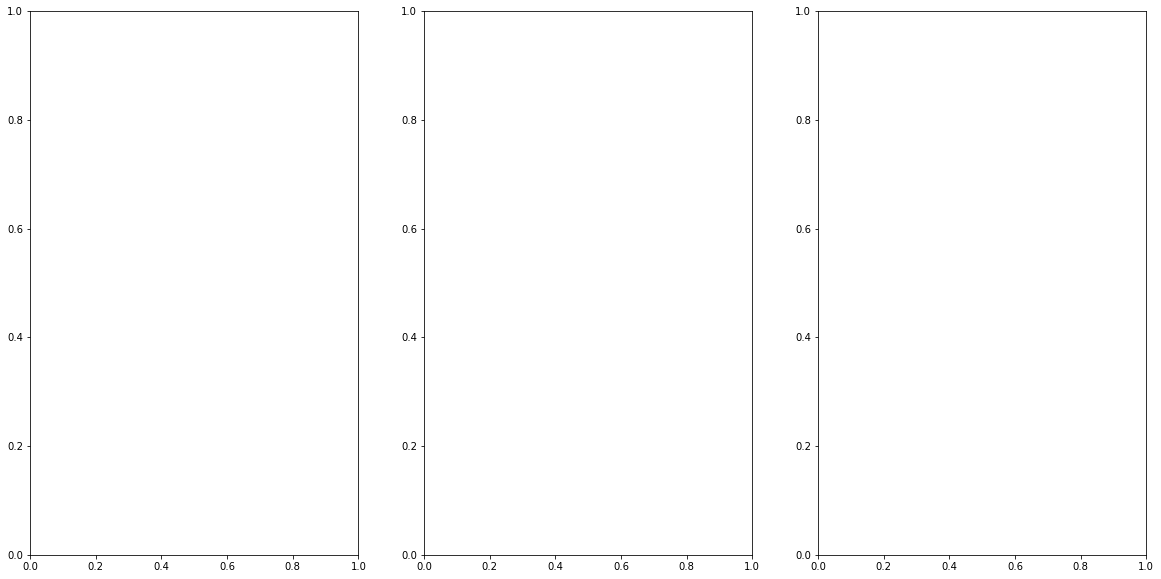

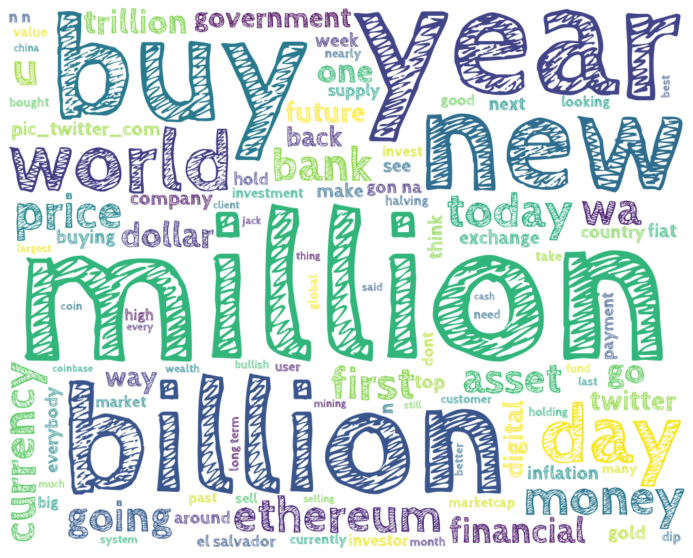

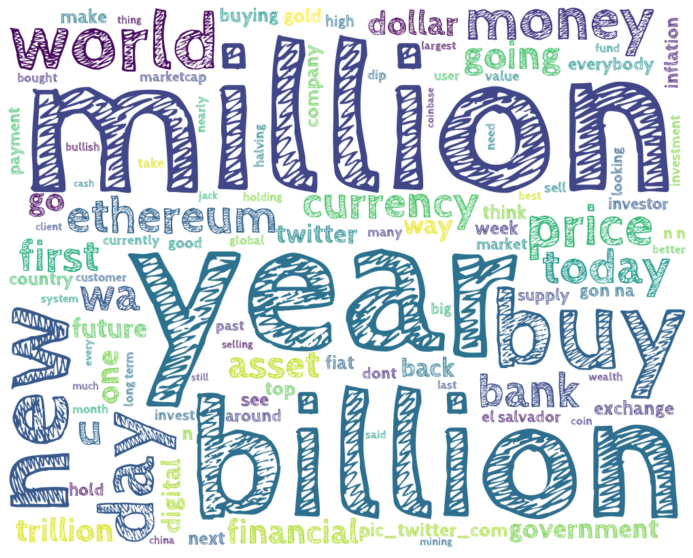

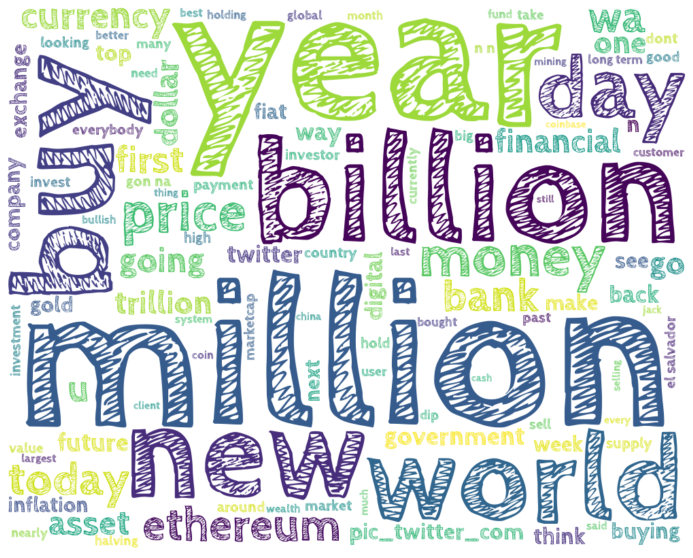

In [42]:
# 1. Plot in same line, this would work
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
fig_pos = generate_wordcloud(pos_df1, 'Sentiment: Postive')
ax2 = fig.add_subplot(1,3,2)
fig_neu = generate_wordcloud(neu_df1, 'Sentiment: Neutral')
ax3 = fig.add_subplot(1,3,3)
fig_neg = generate_wordcloud(neg_df1,'Sentiment: Negative')

##NEED TO SEPERATE THE POS/NEG WORDS

In [43]:
#Datasource #1
# load_files returns a bunch, containing training texts and training labels
#text_trainval, y_trainval = combined_df['clean_text'], combined_df['Close']
text_trainval, y_trainval = initial_db2['clean_text1'], initial_db2['target_x']

from sklearn.model_selection import train_test_split, cross_val_score

#train_test_split
text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval,  shuffle=False)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# count vectorizer
vect = CountVectorizer(max_features=20000, token_pattern=r"\b\w+\b")
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)


In [45]:
X_train

<402x1929 sparse matrix of type '<class 'numpy.int64'>'
	with 4564 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import numpy as np

# use logistic regression to train the text-price model
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_val, y_val)

0.5111111111111111

In [47]:
'''
define the function plot_important_features  
that shows the top n words with greatest absolute coefficients in each side
para:
    coef: a 1-D numerical array with coefficients
    feature_names: a String list contains feature names
    top_n: the top n absolute coefficients in postive/negative side
            top_n = 20 as default
    ax: the plot axis
    rotation: the rotation angle for x label
'''

def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

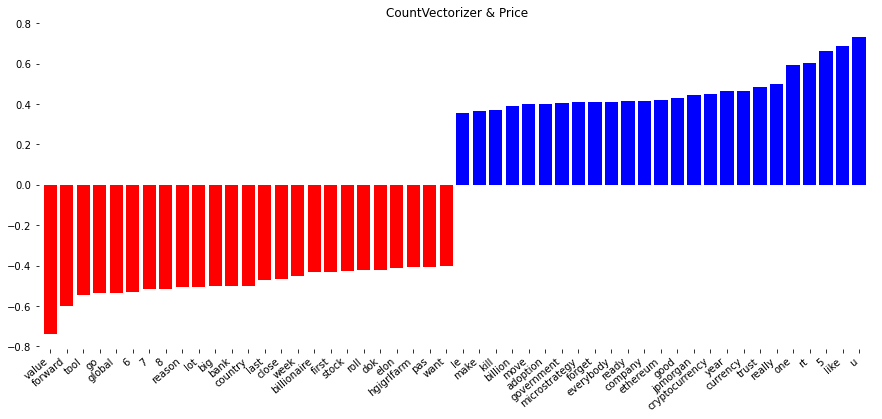

In [48]:
# plot the top 25 greatest absolute coefficient words in each side
feature_names = vect.get_feature_names()
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=25, rotation=40)
_ = plt.title("CountVectorizer & Price")
ax = plt.gca()

In [49]:
##TRYING ANOTHER ML AND VIEW RESULTS

In [50]:
initial_db2.describe()

,Unnamed: 0,Unnamed: 0_x,timestamp,close_x,target_x,VEC.timestamp_x,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,Unnamed: 0_y,close_y,target_y,...,VEC.COINJOURNA.text_COUNT_last1days:bitcoin,sentiment_comp1,sentiment_pos1,sentiment_neg1,sentiment_comp2,sentiment_pos2,sentiment_neg2,sentiment_comp3,sentiment_pos3,sentiment_neg3
count,537.000000,537.000000,5.370000e+02,537.000000,537.000000,5.370000e+02,537.000000,537.000000,537.000000,537.000000,...,537.000000,537.000000,537.000000,537.000000,537.0,537.0,537.0,537.000000,537.000000,537.000000
mean,318.525140,275.217877,1.605468e+09,25208.078659,0.538175,1.605468e+09,1.828678,275.217877,25208.078659,0.538175,...,1.573557,0.216864,0.060607,0.022363,0.0,0.0,0.0,0.087722,0.034493,0.019601
std,227.939243,164.825051,1.654266e+07,17856.471349,0.499005,1.654266e+07,2.133702,164.825051,17856.471349,0.499005,...,2.259038,0.418990,0.081988,0.049891,0.0,0.0,0.0,0.313133,0.065147,0.055417
min,0.000000,0.000000,1.577898e+09,4800.000000,0.000000,1.577898e+09,0.000000,0.000000,4800.000000,0.000000,...,0.000000,-0.967900,0.000000,0.000000,0.0,0.0,0.0,-0.961800,0.000000,0.000000
25%,134.000000,134.000000,1.591031e+09,9436.060000,0.000000,1.591031e+09,0.000000,134.000000,9436.060000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,268.000000,268.000000,1.604768e+09,15297.210000,1.000000,1.604768e+09,1.000000,268.000000,15297.210000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,465.000000,411.000000,1.620839e+09,39723.180000,1.000000,1.620839e+09,3.000000,411.000000,39723.180000,1.000000,...,3.000000,0.584800,0.108000,0.027000,0.0,0.0,0.0,0.025800,0.051000,0.000000
max,879.000000,585.000000,1.632503e+09,63575.000000,1.000000,1.632503e+09,10.000000,585.000000,63575.000000,1.000000,...,10.000000,0.971900,0.482000,0.540000,0.0,0.0,0.0,0.965200,0.444000,0.380000


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [52]:
#Random Forest Regressor is used to predict the exact vaues of the future returns
#Random Forest Classifier is used only for forecasting future price directions

In [53]:
# 1. Data Preparation
data = pd.read_csv('cleaned_text_with_sentiment_scores_df.csv', index_col='timestamp')
data.tail(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,date_x,close_x,target_x,VEC.timestamp_x,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,VEC.CRYPTOCURR.text_last1days:bitcoin,Unnamed: 0_y,...,target,VEC.timestamp,VEC.COINJOURNA.text_COUNT_last1days:bitcoin,VEC.COINJOURNA.text_last1days:bitcoin,clean_text1,clean_text2,clean_text3,sentiment1,sentiment2,sentiment3
timestamp,,,,,,,,,,,,,,,,,,,,,
1.632503e+09,879,879,585,24-09-2021 17:00:00,42810.57,0,1632502800,5,['how long before the sec says that they need ...,585,...,0,1632502800,5,['#policyandregulation #bitcoin fca and bank o...,'how long sec say need protect tipper bitcoin ...,NaN,policyandregulation bitcoin fca bank england c...,"{'neg': 0.026, 'neu': 0.926, 'pos': 0.049, 'co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp..."


In [54]:
# Market Returns - Dependent Variable
y = data['close_x'].diff() / data['close_x'].shift(1)
y.rename('ret', inplace=True)

timestamp
1.577898e+09         NaN
1.577984e+09   -0.032654
1.578071e+09    0.054445
1.578157e+09    0.001246
1.578244e+09    0.000631
                  ...   
1.632157e+09   -0.089458
1.632244e+09   -0.053033
1.632330e+09    0.068965
1.632416e+09    0.030352
1.632503e+09   -0.045797
Name: ret, Length: 537, dtype: float64

In [55]:
# Independent Variables
X = data.iloc[:, 1:]


In [56]:
# 2. Random Forest Regressor
list_lags = []
for i in range(1, 6):
    X_lag = X.shift(i)
    for name in X.columns:
        X_lag.rename(columns={name: f"{name}({-i})"}, inplace=True)
    list_lags.append(X_lag)
    del X_lag
    
X.describe()

,Unnamed: 0.1,Unnamed: 0_x,close_x,target_x,VEC.timestamp_x,VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin,Unnamed: 0_y,close_y,target_y,VEC.timestamp_y,VEC.COIN_SPECT.text_COUNT_last1days:bitcoin,Unnamed: 0.1.1,close,target,VEC.timestamp,VEC.COINJOURNA.text_COUNT_last1days:bitcoin,clean_text2
count,537.000000,537.000000,537.000000,537.000000,5.370000e+02,537.000000,537.000000,537.000000,537.000000,5.370000e+02,537.0,537.000000,537.000000,537.000000,5.370000e+02,537.000000,0.0
mean,318.525140,275.217877,25208.078659,0.538175,1.605468e+09,1.828678,275.217877,25208.078659,0.538175,1.605468e+09,0.0,275.217877,25208.078659,0.538175,1.605468e+09,1.573557,NaN
std,227.939243,164.825051,17856.471349,0.499005,1.654266e+07,2.133702,164.825051,17856.471349,0.499005,1.654266e+07,0.0,164.825051,17856.471349,0.499005,1.654266e+07,2.259038,NaN
min,0.000000,0.000000,4800.000000,0.000000,1.577898e+09,0.000000,0.000000,4800.000000,0.000000,1.577898e+09,0.0,0.000000,4800.000000,0.000000,1.577898e+09,0.000000,NaN
25%,134.000000,134.000000,9436.060000,0.000000,1.591031e+09,0.000000,134.000000,9436.060000,0.000000,1.591031e+09,0.0,134.000000,9436.060000,0.000000,1.591031e+09,0.000000,NaN
50%,268.000000,268.000000,15297.210000,1.000000,1.604768e+09,1.000000,268.000000,15297.210000,1.000000,1.604768e+09,0.0,268.000000,15297.210000,1.000000,1.604768e+09,0.000000,NaN
75%,465.000000,411.000000,39723.180000,1.000000,1.620839e+09,3.000000,411.000000,39723.180000,1.000000,1.620839e+09,0.0,411.000000,39723.180000,1.000000,1.620839e+09,3.000000,NaN
max,879.000000,585.000000,63575.000000,1.000000,1.632503e+09,10.000000,585.000000,63575.000000,1.000000,1.632503e+09,0.0,585.000000,63575.000000,1.000000,1.632503e+09,10.000000,NaN


In [57]:
# Features - lagged values of sentiment measures
X_lagged = pd.concat(list_lags, axis=1)
X_lagged.dropna(inplace=True)
#y = y.loc[X_lagged.index[0]:]
X_lagged

,Unnamed: 0.1(-1),Unnamed: 0_x(-1),date_x(-1),close_x(-1),target_x(-1),VEC.timestamp_x(-1),VEC.CRYPTOCURR.text_COUNT_last1days:bitcoin(-1),VEC.CRYPTOCURR.text_last1days:bitcoin(-1),Unnamed: 0_y(-1),date_y(-1),...,target(-5),VEC.timestamp(-5),VEC.COINJOURNA.text_COUNT_last1days:bitcoin(-5),VEC.COINJOURNA.text_last1days:bitcoin(-5),clean_text1(-5),clean_text2(-5),clean_text3(-5),sentiment1(-5),sentiment2(-5),sentiment3(-5)
timestamp,,,,,,,,,,,,,,,,,,,,,


In [58]:
# We drop correlated features because with so many binary 
# ngram variables there's a lot of noise

corr_matrix = initial_db2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
initial_db2.drop([column for column in upper.columns if any(upper[column] > 0.5)], 
                 axis=1, inplace=True)

In [59]:
# Now we separate in train/test sets

X = initial_db.loc[:, initial_db2.columns != 'target_x'].select_dtypes(include=[np.number]).drop(drop_cols, axis = 1).values
y = initial_db.loc[:,['target_x']].values
div = int(round(len(X) * 0.2))
X_train = X[:div]
y_train = y[:div]
X_test = X[div:]
y_test = y[div:]

NameError: name 'initial_db' is not defined